<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_CursoPython/blob/main/Modulo1_b/09.seaborn_teoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Seaborn

**`seaborn`** es una librería de visualización de datos para python desarrollada sobre **`matplotlib`**. Ofrece una interfaz de alto nivel para la creación de gráficas. Además, está integrada con las estructuras de datos de **`pandas`**, lo que permite utilizar el nombre de los **`DataFrames`** y campos directamente como argumentos de las funciones de visualización.


|Función                | Plot                                                                                                                                  |
|-----------------------|--------------------------------------------------------------------------------------------------------------------------------------|
|**`sns.pairplot()`**   | Crea una matriz de graficas, en la diagonal aparece el **`histograma`** y en los demás una gráfica de **`dispersión`**.              |
|**`sns.barplot()`**    | Crea un gráfico de barras con el promedio de los valores.                                                                            |
|**`sns.countplot()`**  | Crea un grafico de barras con el conteo de cada categoria.                                                                            |
|**`sns.histplot()`**   | Crea un histograma.                                                                                                                  |
|**`sns.scatterplot()`**| Crea un scatterplot.                                                                                                                  |
|**`sns.jointplot()`**  | Crea graficos de dispersión con histogramas.                                                                                          |
|**`sns.kdeplot()`**    | Crea graficos de densidad de probabilidad de la curva continua de los datos.                                                          |
|**`sns.boxplot()`**    | Crea graficos de caja.                                                                                                                |
|**`sns.violinplot()`** | Crea graficos de violin.                                                                                                            |
|**`sns.heatmap()`**    | Crea mapas de calor.                                                                                                                  |
|**`sns.FacetGrid()`**  | Genera una matriz de graficas filtrando por las columnas y filas del **`DataFrame`** y aplicando una misma grafica a toda la matriz.|

In [3]:
!git clone https://github.com/ednavivianasegura/ERAP_CursoPython.git

Cloning into 'ERAP_CursoPython'...
remote: Enumerating objects: 526, done.
remote: Counting objects: 100% (194/194), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 526 (delta 98), reused 25 (delta 25), pack-reused 332 (from 2)
Receiving objects: 100% (526/526), 27.65 MiB | 23.91 MiB/s, done.
Resolving deltas: 100% (200/200), done.


In [4]:
import os
os.chdir("/content/ERAP_CursoPython/Modulo1_b")

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df1 = pd.read_excel("Data/Airbnb_NYC.xlsx", sheet_name = "NYC1")
df2 = pd.read_excel("Data/Airbnb_NYC.xlsx", sheet_name = "NYC2")

df = pd.merge(right = df1, left = df2, right_on = "id", left_on = "id")

df.head(3)


,id,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,name,host_id,host_name,municipio,barrio,latitude,longitude,room_type
0,2539.0,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room
1,2595.0,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt
2,3647.0,150.0,3.0,0.0,NaT,NaN,1.0,365.0,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room


In [7]:
df.shape

(48895, 16)

In [8]:
df = df.sort_values("price").iloc[1000:20000][["host_id", "municipio", "number_of_reviews", "reviews_per_month", "price", "room_type"]]

df.head(3)

,host_id,municipio,number_of_reviews,reviews_per_month,price,room_type
31398,53163551,Brooklyn,4.0,0.28,35.0,Private room
35960,48303314,Queens,21.0,2.23,35.0,Private room
48341,67567916,Brooklyn,0.0,NaN,35.0,Shared room


In [9]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### sns.pairplot()

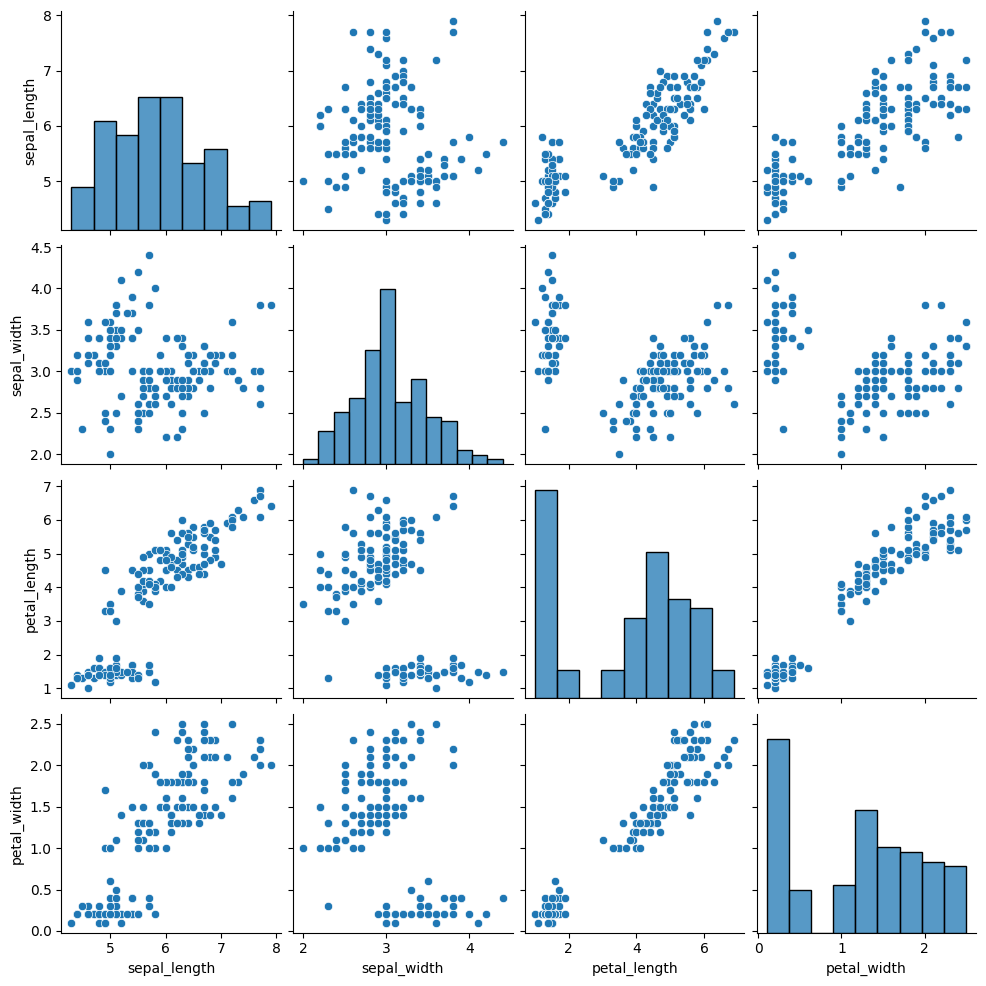

In [10]:
sns.pairplot(iris)
plt.show()

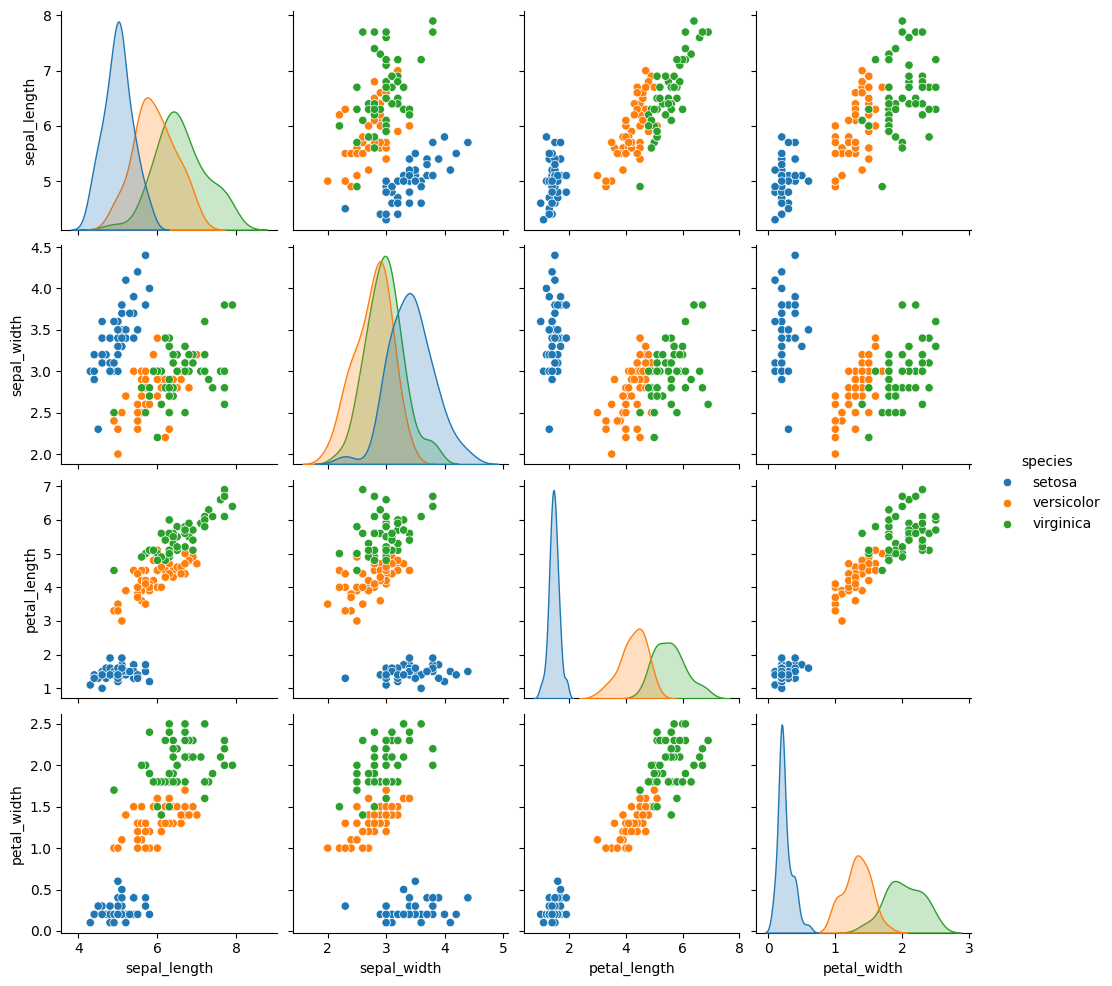

In [11]:
# Con la parámetro "hue" podemos ver cada categoría por color

sns.pairplot(iris, hue = "species")
plt.show()

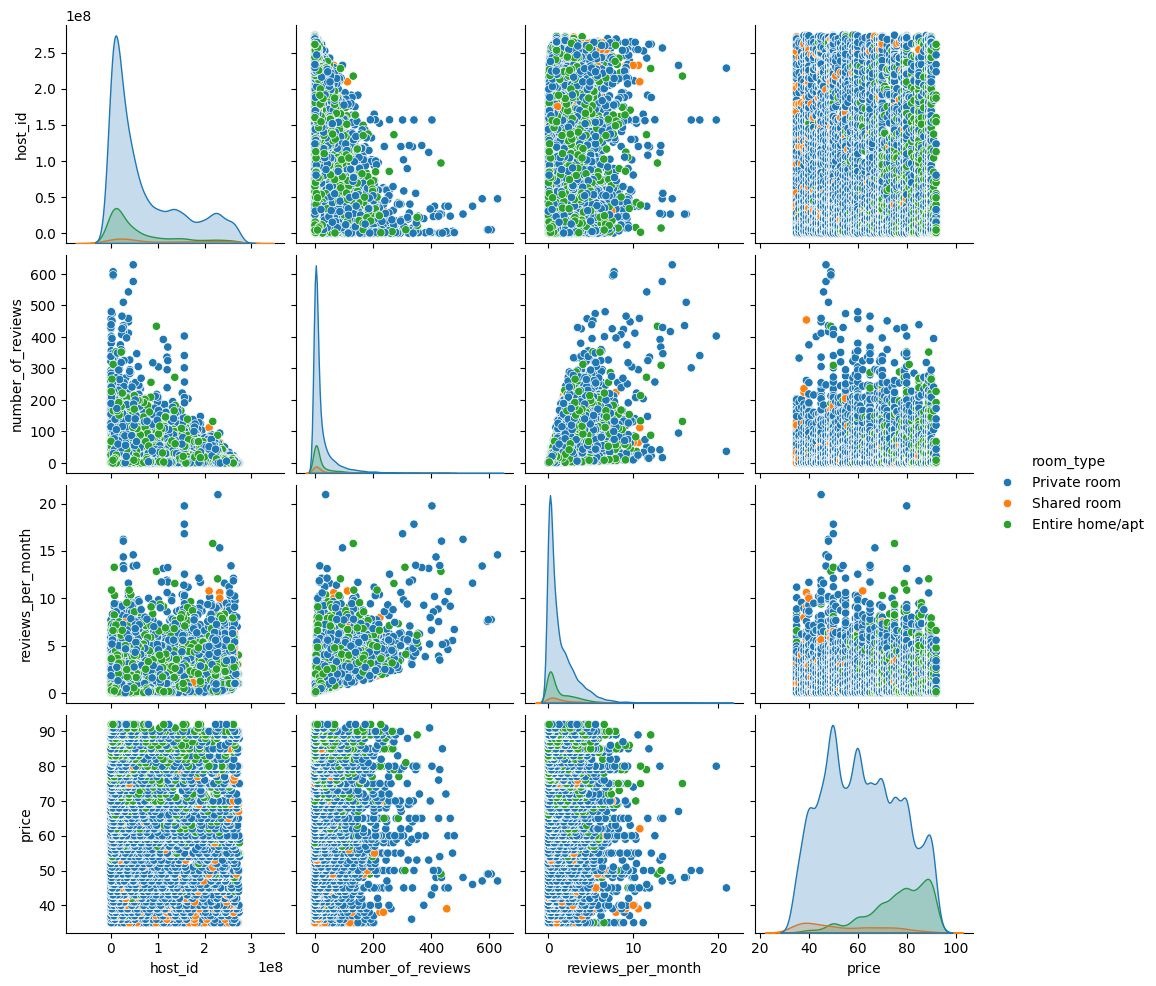

In [12]:
sns.pairplot(df, hue = "room_type")
plt.show()

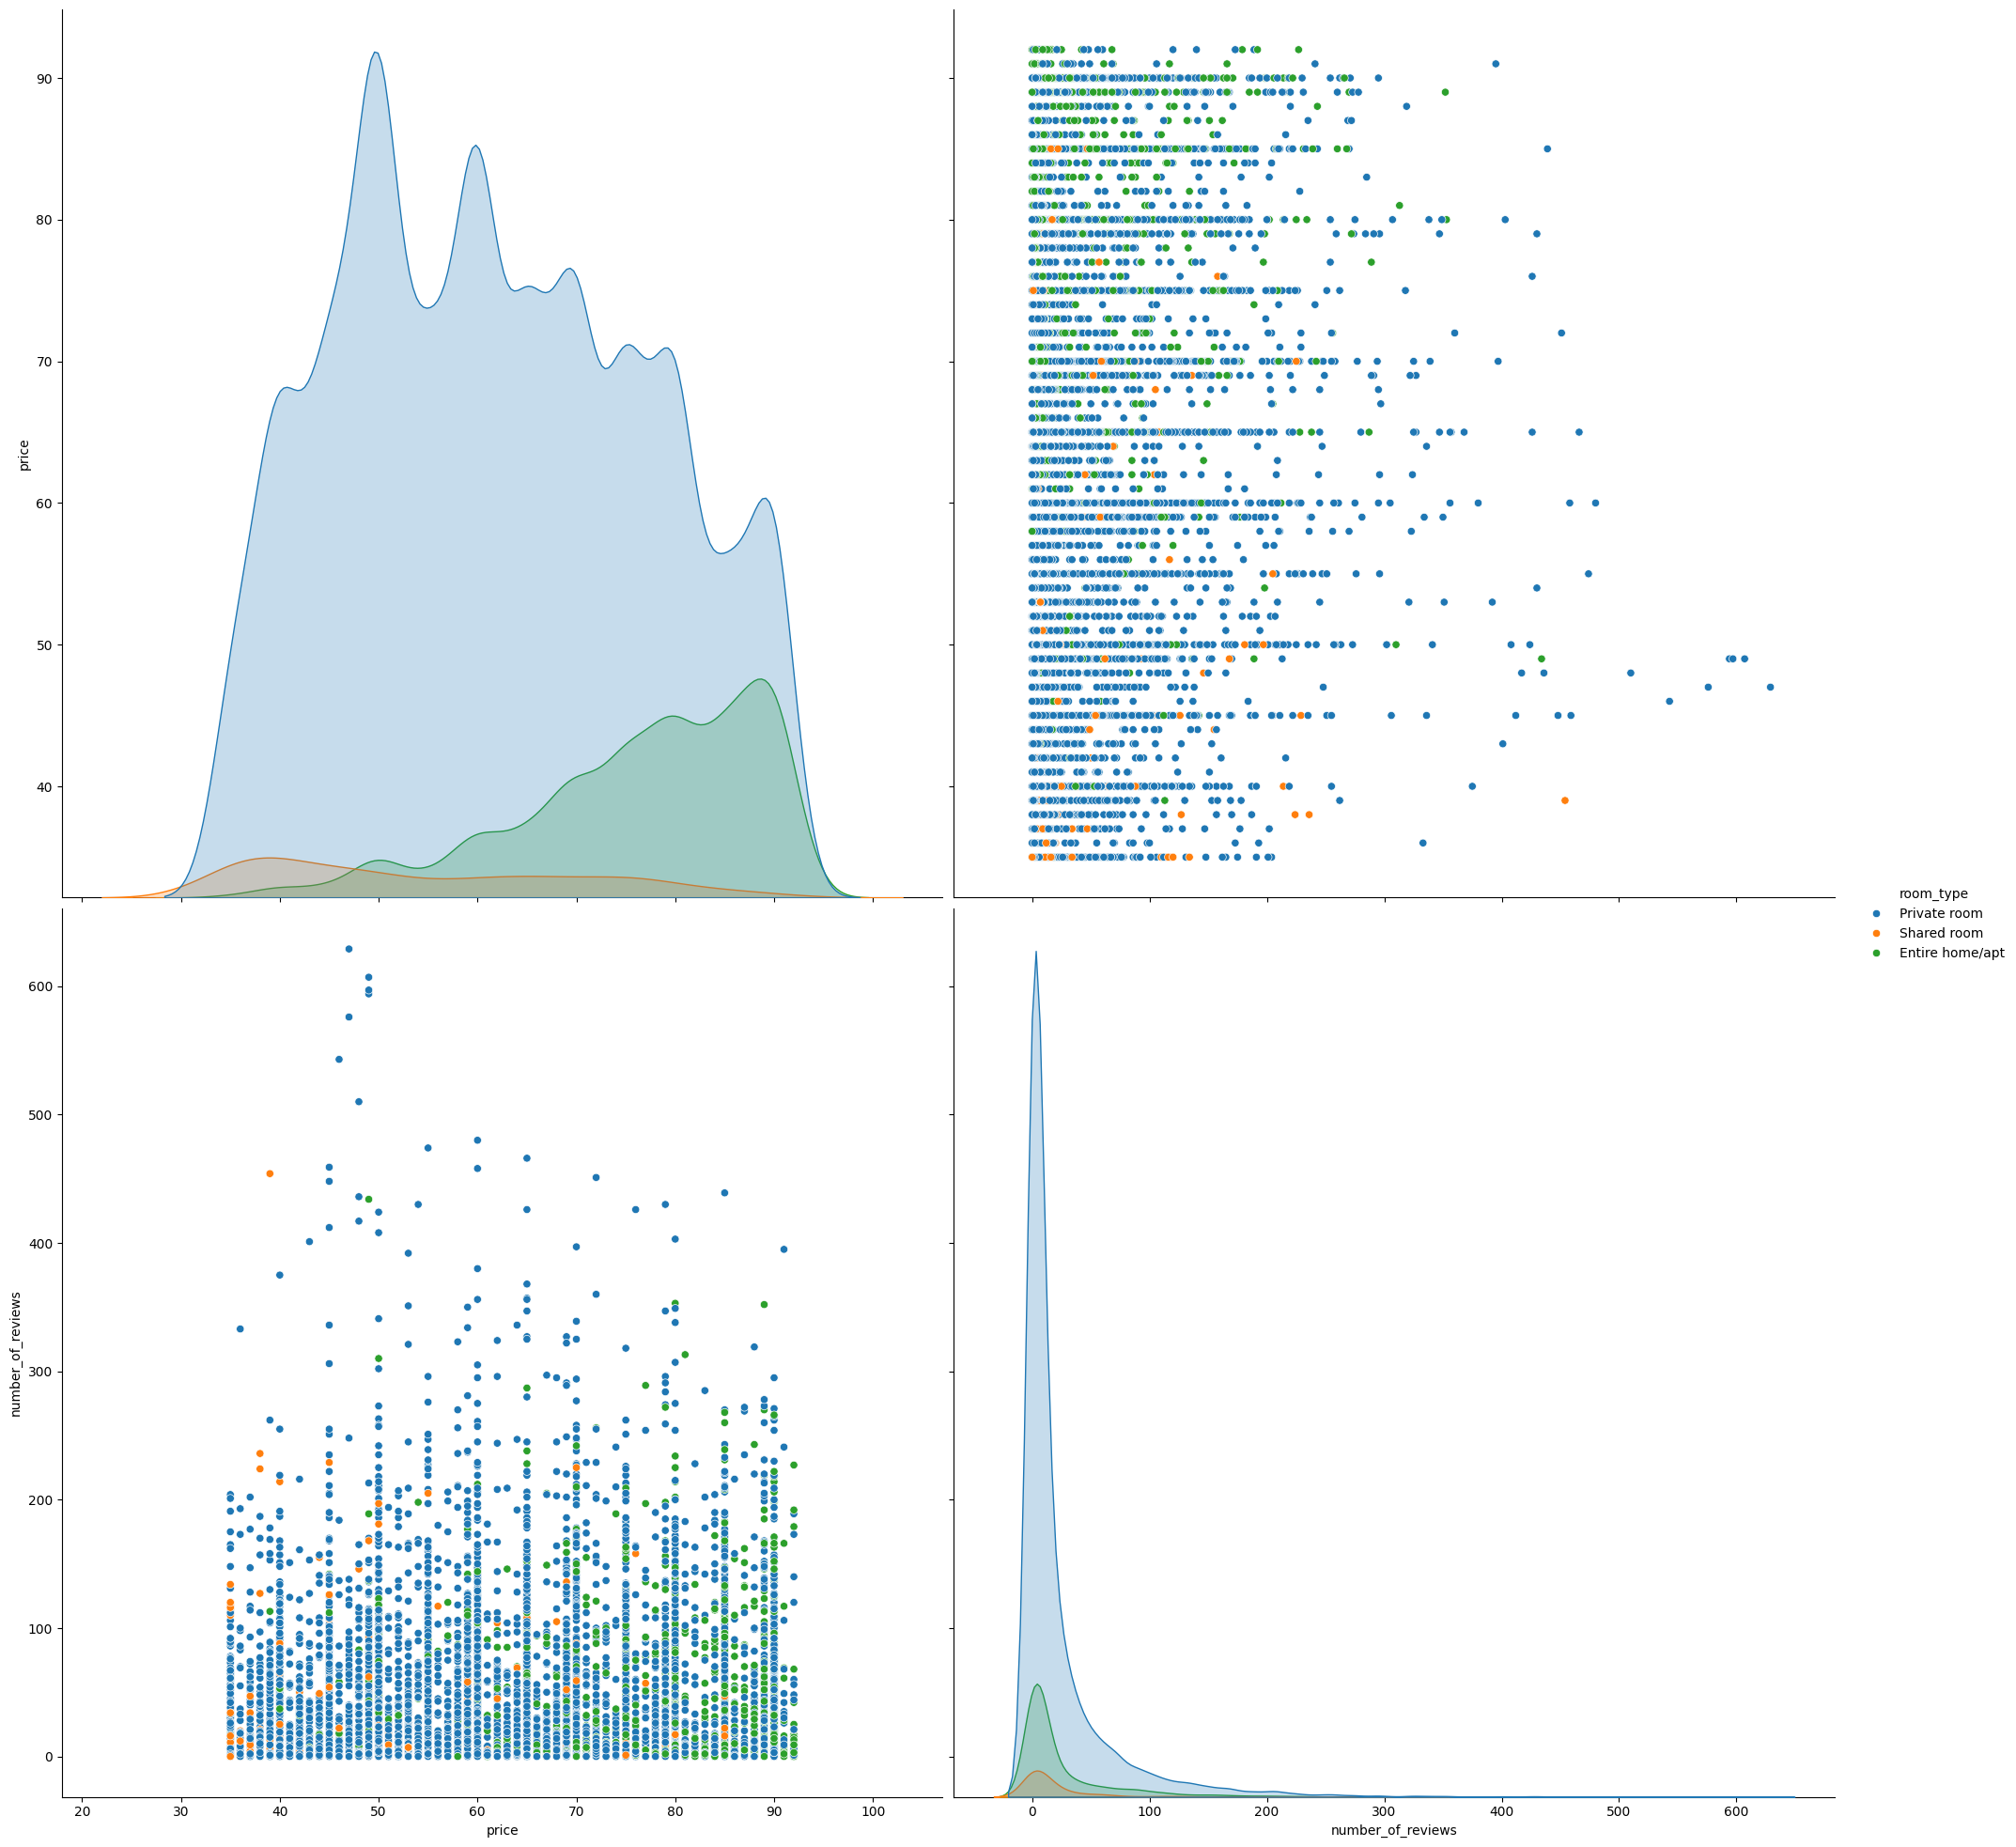

In [13]:
# Con "vars" podemos elegir cuales columnas mostrar
# Con "height" podemos modificar el tamaño de las graficas

sns.pairplot(df, vars = ["price", "number_of_reviews"], height = 10, hue = "room_type")
plt.show()

### sns.barplot()

In [14]:
df.groupby("room_type", as_index = False)["price"].mean()

,room_type,price
0,Entire home/apt,76.311848
1,Private room,61.805138
2,Shared room,54.554559


In [15]:
df.groupby("room_type", as_index = False)["price"].std()

,room_type,price
0,Entire home/apt,12.203120
1,Private room,15.340177
2,Shared room,15.918263


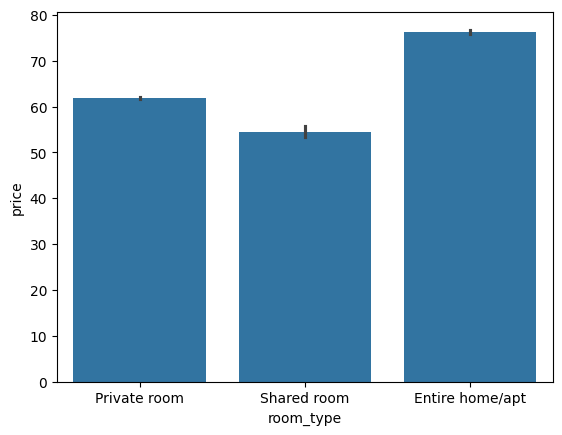

In [16]:
# Muestra el promedio del precio del tipo de habitación

sns.barplot(x = "room_type", y = "price", data = df)
plt.show()

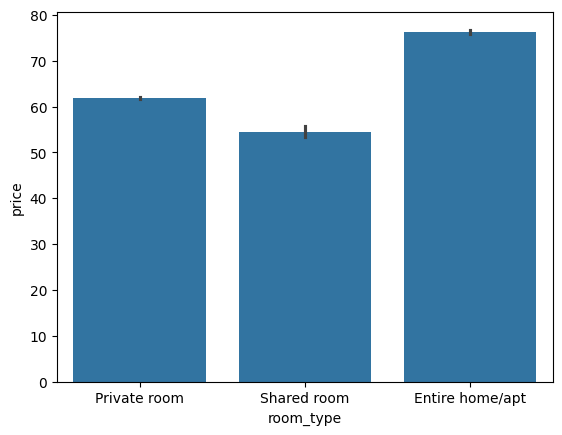

In [17]:
# Otra forma de usar los parámetros

sns.barplot(x = df["room_type"], y = df["price"])
plt.show()

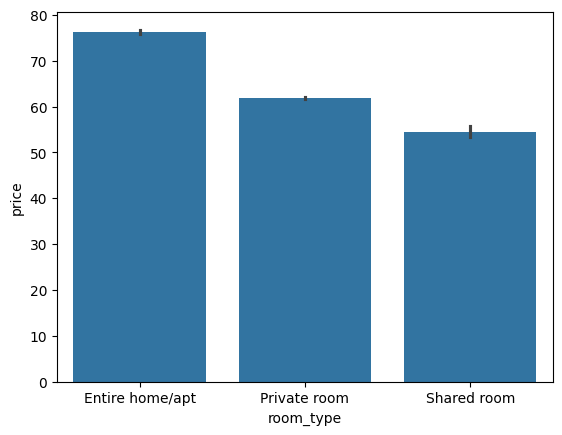

In [18]:
# Con "order" podemos elegir el orden en el que aparecen

sns.barplot(x = "room_type", y = "price", data = df, order = ["Entire home/apt", "Private room", "Shared room"])
plt.show()

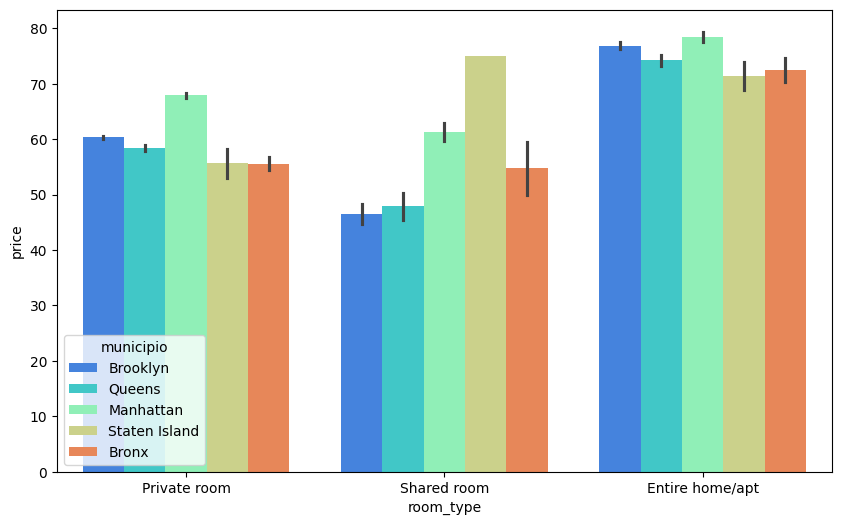

In [19]:
plt.figure(figsize = (10, 6))

sns.barplot(x = "room_type", y = "price", hue = "municipio", data = df, palette = "rainbow")

plt.show()

In [20]:
df.groupby(["room_type", "municipio"], as_index = False)["price"].mean()

,room_type,municipio,price
0,Entire home/apt,Bronx,72.567568
1,Entire home/apt,Brooklyn,76.837619
2,Entire home/apt,Manhattan,78.492308
3,Entire home/apt,Queens,74.201149
4,Entire home/apt,Staten Island,71.382353
5,Private room,Bronx,55.590476
6,Private room,Brooklyn,60.315665
7,Private room,Manhattan,67.884808
8,Private room,Queens,58.371168
9,Private room,Staten Island,55.631579


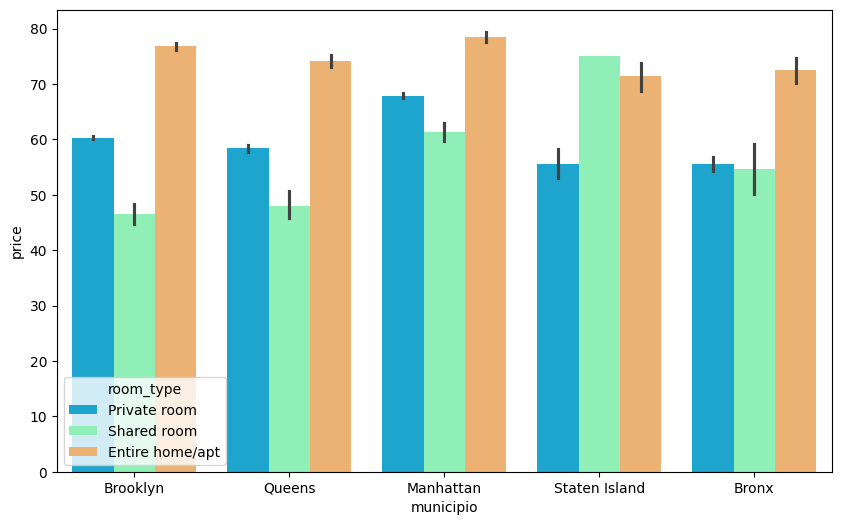

In [21]:
fig, ax = plt.subplots(figsize = (10, 6))

sns.barplot(x = "municipio", y = "price", hue = "room_type", data = df, palette = "rainbow")
plt.show()

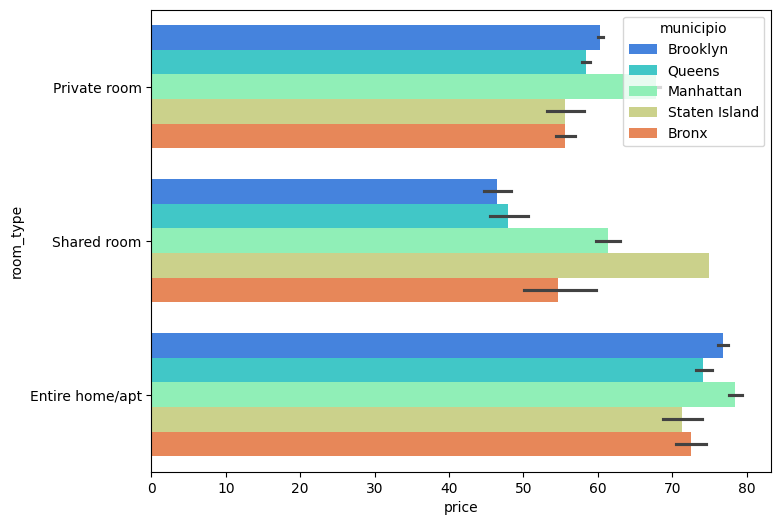

In [22]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(x = "price", y = "room_type", hue = "municipio", data = df, palette = "rainbow")
plt.show()

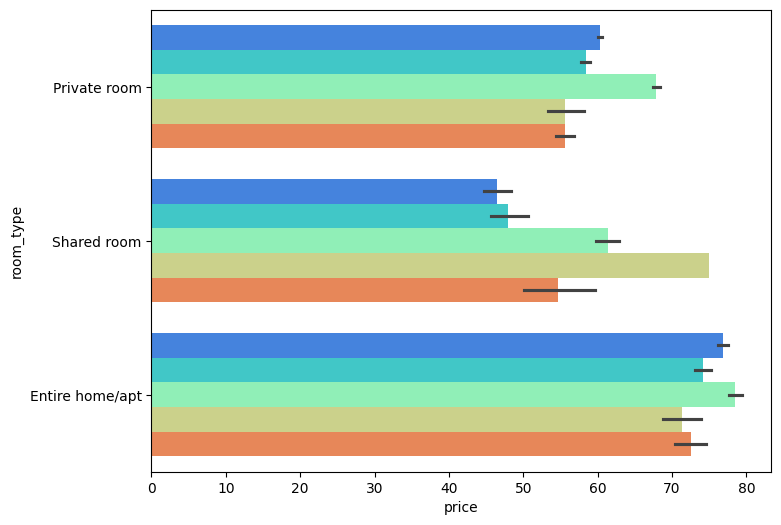

In [23]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(x = "price", y = "room_type", hue = "municipio", data = df, palette = "rainbow")

ax.legend_.remove()
plt.show()

### sns.countplot()

**`sns.countplot()`** es la función **`plt.bar()`** de **`matplotlib`**.

In [24]:
df["room_type"].value_counts()

,count
room_type,
Private room,15647
Entire home/apt,2684
Shared room,669


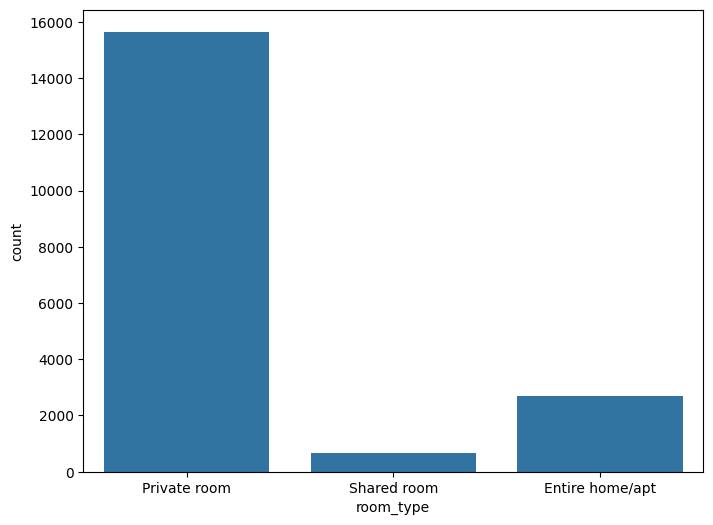

In [25]:
plt.figure(figsize = (8, 6))

sns.countplot(x = df["room_type"])

plt.show()

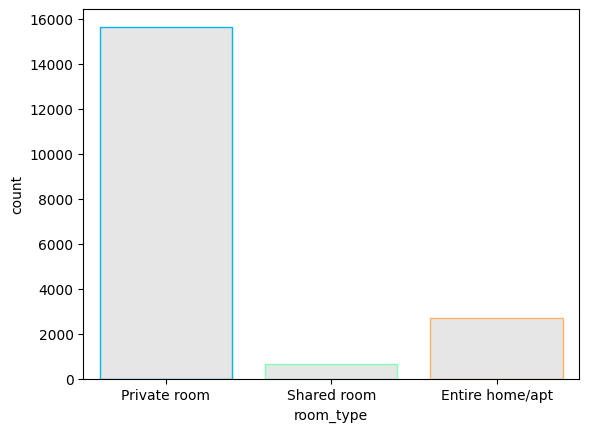

In [26]:
# El número dentro del color_palette se utiliza para elegir el número de colores
sns.countplot(x         = df["room_type"],
              facecolor = (0.9, 0.9, 0.9),
              linewidth = 1,
              edgecolor = sns.color_palette("rainbow", 3))
plt.show()

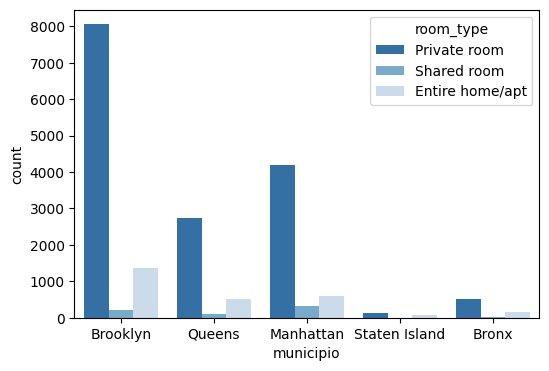

In [27]:
plt.figure(figsize = (6, 4))
sns.countplot(x = "municipio", hue = "room_type", data = df, palette = "Blues_r")
plt.show()

### Histogramas

**`sns.histplot()`**

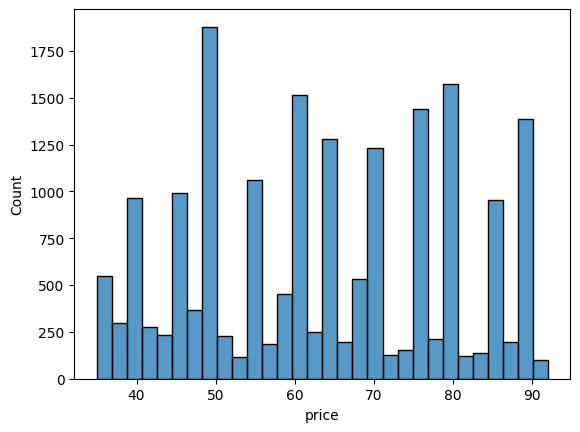

In [28]:
sns.histplot(df["price"])
plt.show()

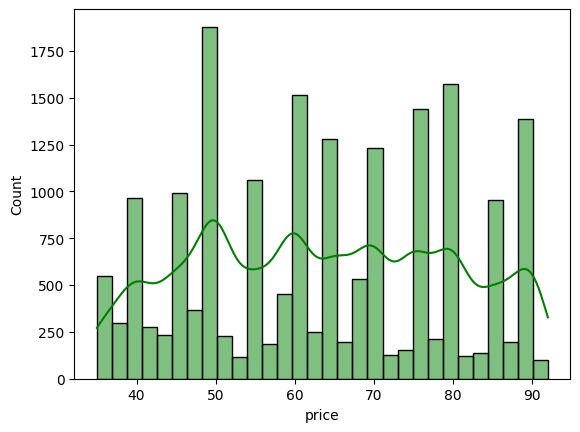

In [29]:
sns.histplot(df["price"], color = "green", kde = True)
plt.show()

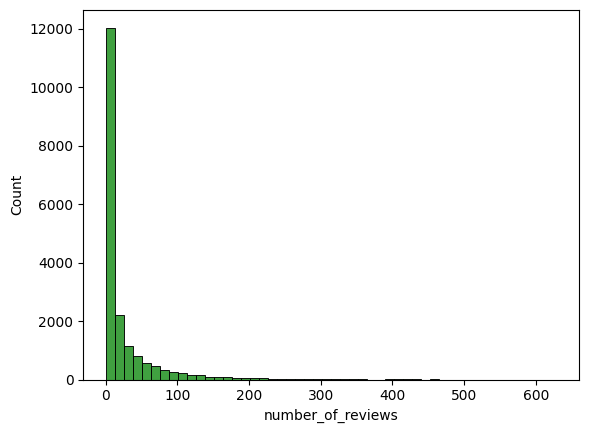

In [30]:
sns.histplot(df["number_of_reviews"], color = "green", bins = 50)
plt.show()

### Scatter Plots (graficos de dispersión)
**`sns.scatterplot()`**

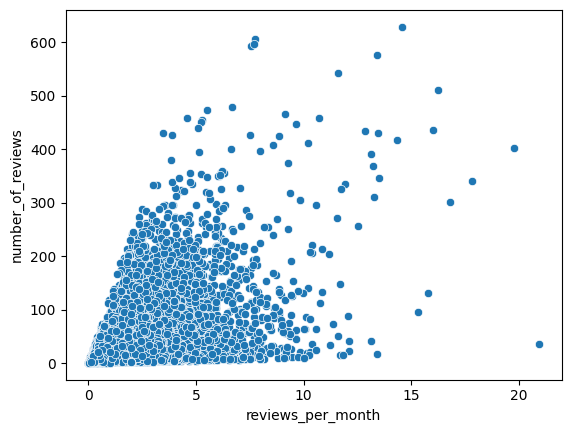

In [31]:
sns.scatterplot(x = df["reviews_per_month"], y = df["number_of_reviews"])
plt.show()

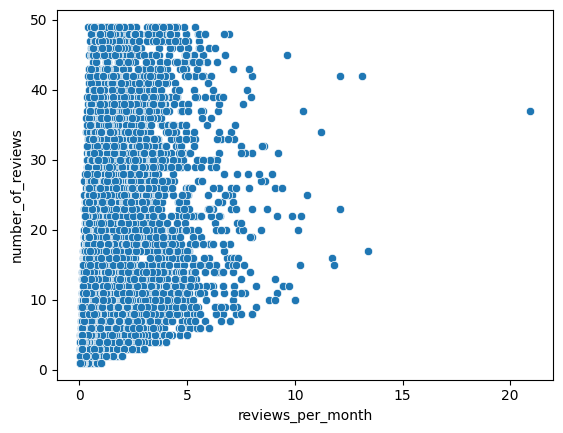

In [32]:
sns.scatterplot(x = df[df["number_of_reviews"] < 50].reviews_per_month,
                y = df[df["number_of_reviews"] < 50].number_of_reviews)

plt.show()

### Joint Plots
**`sns.jointplot()`**

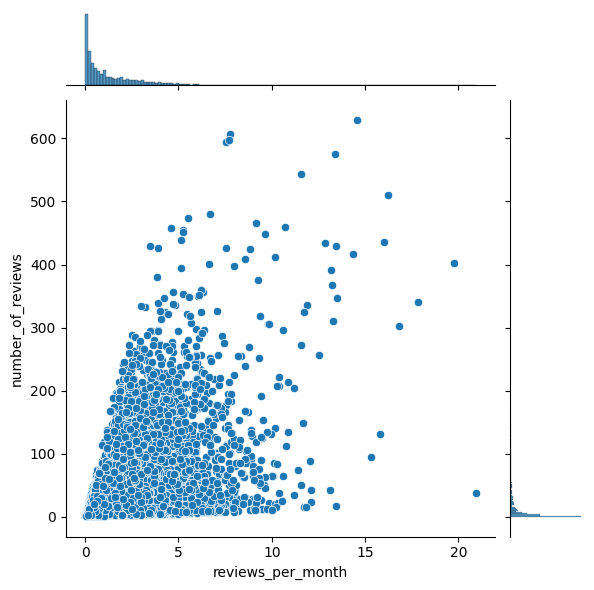

In [33]:
sns.jointplot(x = df["reviews_per_month"], y = df["number_of_reviews"])
plt.show()

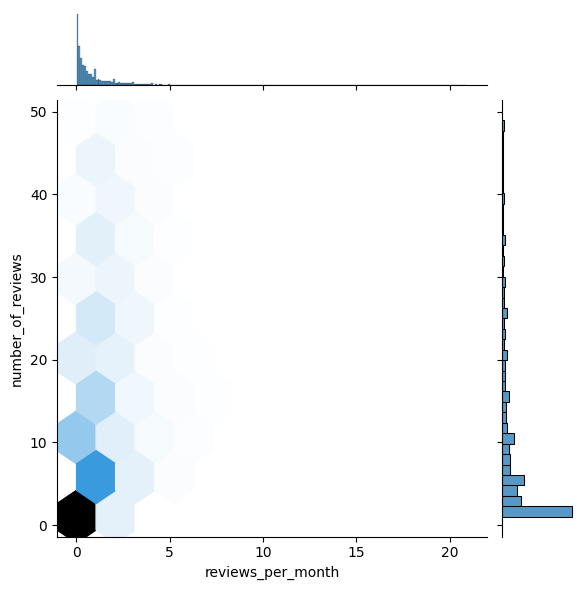

In [34]:
sns.jointplot(x = df[df["number_of_reviews"] < 50].reviews_per_month,
              y = df[df["number_of_reviews"] < 50].number_of_reviews,
              kind = "hex",
              gridsize = 10)

plt.show()

### sns.kdeplot()

**`Kernel Density Estimate (KDE)`** nos permite estimar la función de densidad de probabilidad de la curva continua (o no paramétrica) de nuestro conjunto de datos en una o más dimensiones.

En otras palabras, es un método para la visualización de las distribución de los **patrones** u **observaciones** del dataset, es análogo a un histograma.

<ipython-input-35-e6d1bd406305>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["reviews_per_month"].replace({np.nan : df["reviews_per_month"].mean()}, inplace = True)


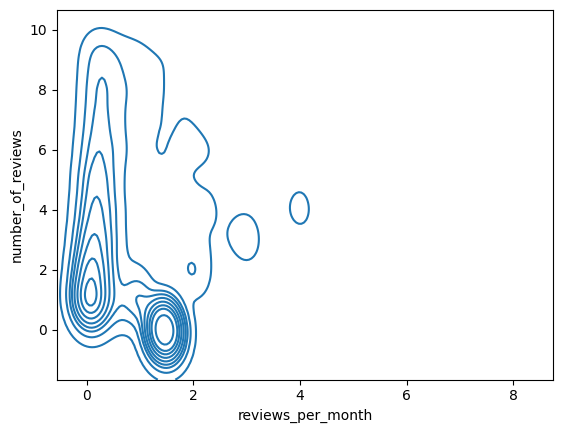

In [35]:
df["reviews_per_month"].replace({np.nan : df["reviews_per_month"].mean()}, inplace = True)

sns.kdeplot(x = df[df["number_of_reviews"] < 10].reviews_per_month,
            y = df[df["number_of_reviews"] < 10].number_of_reviews)
plt.show()

<ipython-input-36-2221cfd37142>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = df[df["number_of_reviews"] < 10].reviews_per_month,


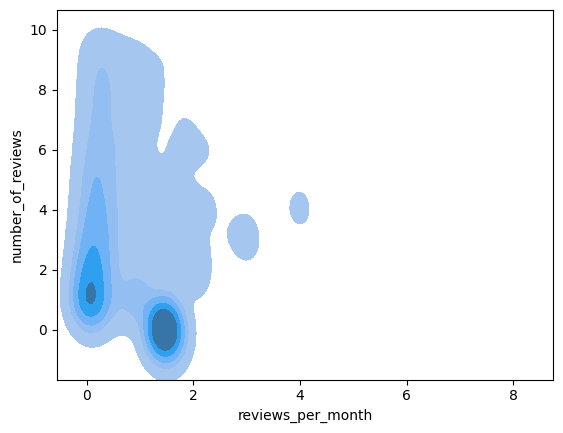

In [36]:
sns.kdeplot(x = df[df["number_of_reviews"] < 10].reviews_per_month,
            y = df[df["number_of_reviews"] < 10].number_of_reviews,
           shade = True,
           n_levels = 6)
plt.show()

<ipython-input-37-37e592ee0ab7>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = df[df["number_of_reviews"] < 10].reviews_per_month,


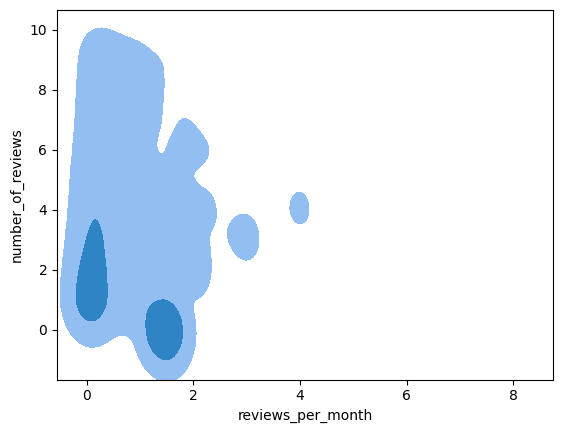

In [37]:
sns.kdeplot(x = df[df["number_of_reviews"] < 10].reviews_per_month,
            y = df[df["number_of_reviews"] < 10].number_of_reviews,
           shade = True,
           n_levels = 3)
plt.show()

### sns.boxplot() y sns.violinplot()

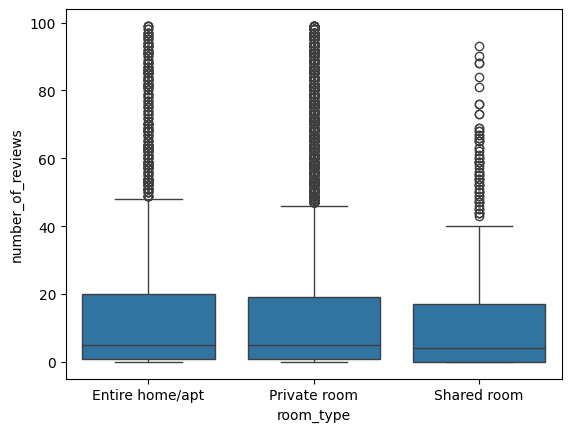

In [38]:
sns.boxplot(x = df["room_type"],
            y = df[df["number_of_reviews"] < 100].number_of_reviews)

plt.show()

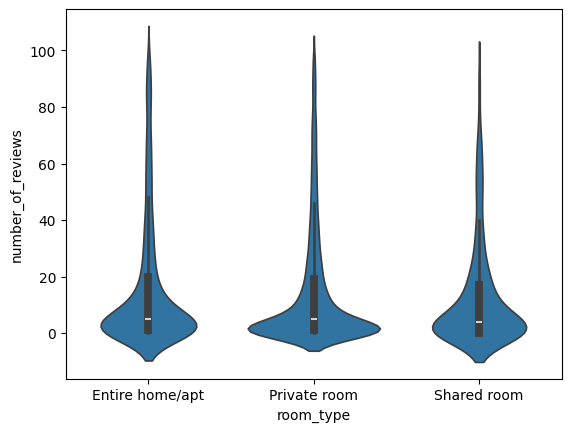

In [39]:
sns.violinplot(x = df.room_type,
               y = df[df["number_of_reviews"] < 100].number_of_reviews)

plt.show()

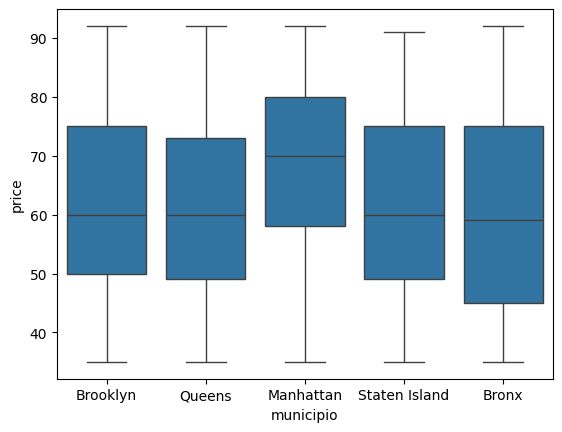

In [40]:
sns.boxplot(x = "municipio", y = "price", data = df)
plt.show()

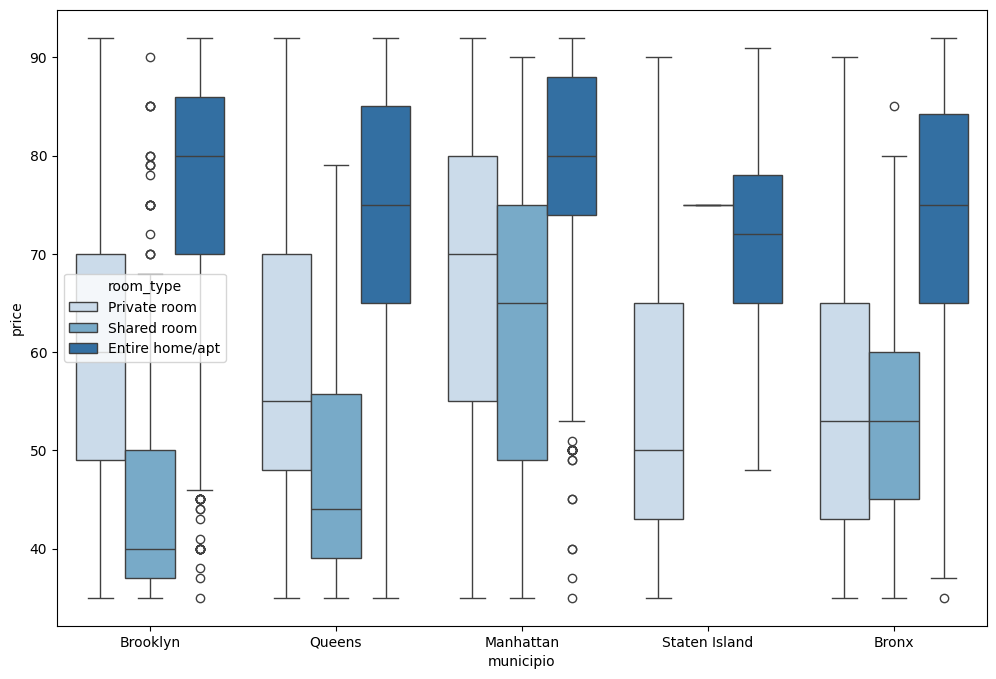

In [41]:
plt.subplots(figsize = (12, 8))

sns.boxplot(x = "municipio",
            y = "price",
            hue = "room_type",
            data = df[df["price"] < 210],
            palette = "Blues")
plt.show()

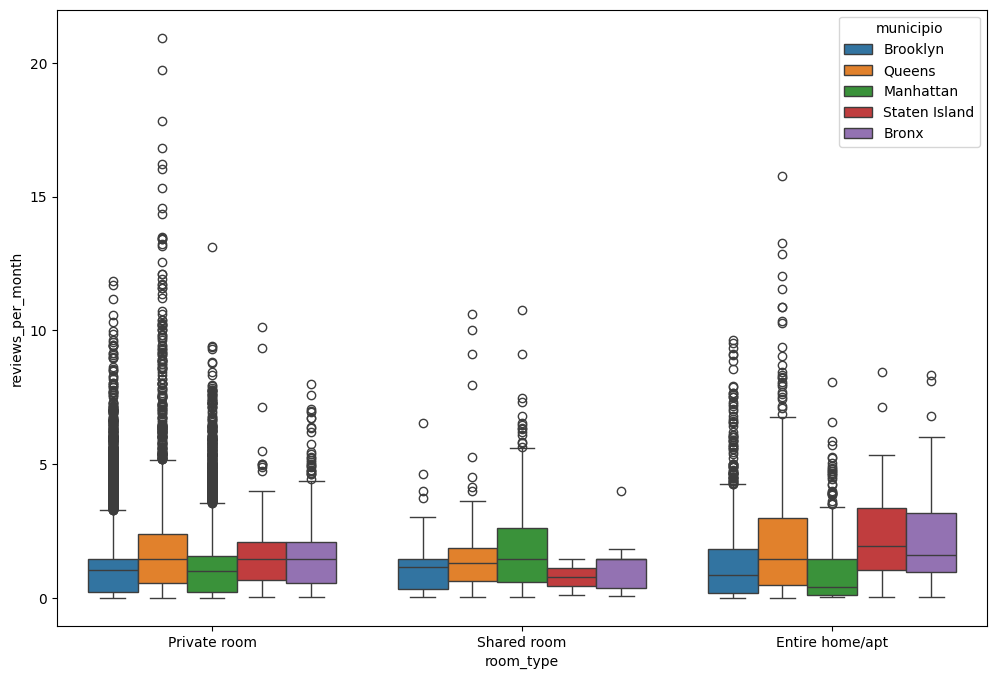

In [42]:
plt.subplots(figsize = (12, 8))

sns.boxplot(x = "room_type",
            y = "reviews_per_month",
            hue = "municipio",
            data = df)

plt.show()

### sns.heatmap()

Mapas de calor.

In [43]:
df[["number_of_reviews", "reviews_per_month", "price"]].corr()

,number_of_reviews,reviews_per_month,price
number_of_reviews,1.000000,0.564946,0.052510
reviews_per_month,0.564946,1.000000,0.011915
price,0.052510,0.011915,1.000000


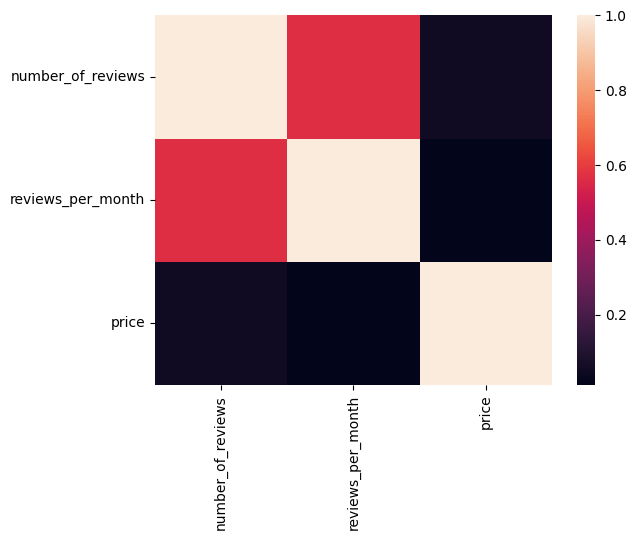

In [44]:
sns.heatmap(data = df[["number_of_reviews", "reviews_per_month", "price"]].corr())
plt.show()

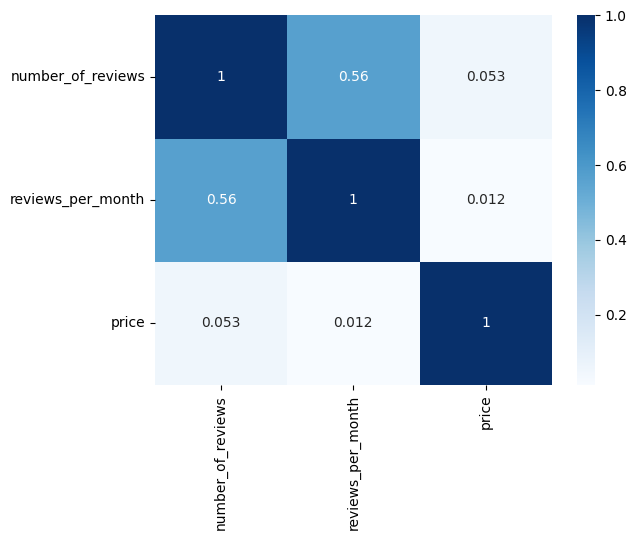

In [45]:
sns.heatmap(data = df[["number_of_reviews", "reviews_per_month", "price"]].corr(),
            annot = True,
            cmap = "Blues")
plt.show()

In [46]:
sns.heatmap(data = df.corr(),
            annot = True,
            cmap = "Blues")
plt.show()

ValueError: could not convert string to float: 'Brooklyn'

### FacetGrid()

**`sns.FacetGrid()`** genera una matriz de graficas filtrando por las columnas y filas del DataFrame y aplicando una misma grafica a toda la matriz.

In [ ]:
g = sns.FacetGrid(df, col = "municipio", row = "room_type")
g.map(plt.hist, "price")
plt.show()

In [ ]:
g = sns.FacetGrid(df, col = "municipio", row = "room_type")
g.map(sns.violinplot, "price")
plt.show()

In [ ]:
g = sns.FacetGrid(df, col = "municipio", row = "room_type")
g.map(sns.histplot, "price")
plt.show()

### Otros Plots

In [ ]:
labels = np.array(iris.columns[:-1])

pattern = iris.iloc[149, :-1]

angles = np.linspace(0, 2*np.pi, len(labels), endpoint = False)
print(angles)

# Esto es para añadir el último lado del polígono:
pattern = np.concatenate((pattern, [pattern[0]]))
angles = np.concatenate((angles, [angles[0]]))


fig = plt.figure()
ax = fig.add_subplot(polar = True)

ax.plot(angles, pattern, "o-", linewidth = 4)           # Lineas en azul
ax.fill(angles, pattern, alpha = 1, color = "yellow")   # Relleno amarillo
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels)      # Malla

plt.show()

In [ ]:
################################################################################################################################